# Bibliotecas

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Carregamento dos dados

In [3]:
dados = pd.read_csv('dados-padaria.csv')
dados

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


## Análise exploratoria e tratamento dos dados

In [4]:
#dataset com 5 colunas e quase 21 linhas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [5]:
#vou fazer um tratamento para isolar apenas os id de transações unicas
#isso é necessario porque as vezes mais de 1 item é vendido na transação 
# e a ideia é isolar o que foi vendido em cada transacao

transacao = []

for item in dados['TransactionNo'].unique():
    lista= list(set(dados[dados['TransactionNo'] == item]['Items']))
    transacao.append(lista)

In [6]:
#primeiras 5 linhas 
transacao [0:5]

[['Bread'],
 ['Scandinavian'],
 ['Cookies', 'Jam', 'Hot chocolate'],
 ['Muffin'],
 ['Bread', 'Coffee', 'Pastry']]

In [7]:
#instalei e chamei a extensão mlxtend para fazer essa regra associativa
# MLXTEND é uma biblioteca que cria extensões de aplicações de machine learning

!pip install mlxtend

- ### Um tratamento necessario é converter as listas de itens em um dataframe com as transações que o ML possar processar, pois esse somente reconhece binario
- ### TransctionEncoder() utiliza o one hot encoding para transformar os dados categoricos em valores boleanos

In [8]:
#carregamento da libs
from mlxtend.preprocessing import TransactionEncoder

In [9]:
#chamo o instanciamento dessa biblioteca
te= TransactionEncoder()

In [10]:
#abro uma variavel para armazenar meus dados transformados
transacao_te = te.fit(transacao).transform(transacao)

In [11]:
transacao_te

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
#transformo alista acima de array para um dataframe
transacao_transformada = pd.DataFrame(transacao_te, columns = te.columns_)
transacao_transformada

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Algoritimo APRIORI

In [13]:
#carregamento da libs para suporte
from mlxtend.frequent_patterns import apriori

In [14]:
#nessa etapa eu faço a separação dos conjuntos frequentes 
#suporte minimo como 0.032
# e já classfico para os dados aparecer em ordem crescente


items_frequentes_apriori = apriori(transacao_transformada, use_colnames=True, min_support=0.02)
items_frequentes_apriori.sort_values(['support'], ascending=False)

,support,itemsets
4,0.478394,(Coffee)
1,0.327205,(Bread)
16,0.142631,(Tea)
3,0.103856,(Cake)
20,0.090016,"(Bread, Coffee)"
11,0.086107,(Pastry)
12,0.071844,(Sandwich)
9,0.061807,(Medialuna)
7,0.058320,(Hot chocolate)
23,0.054728,"(Cake, Coffee)"


In [15]:
#carregamento da libs para regras de associacao
from mlxtend.frequent_patterns import association_rules

In [16]:
#variavel para armazenar o conjunto de itens frequentes 
#metrica de destaque confiança com minimo de 0.5 isso significa que se estiver dentro de 0.5 já considero valida as informações

#então nas minhas informações eu tenho antecedentes que o cliente compra e o consequente das compras também
#isso inclui as metricas de suporte para essa analise

regras_apriori = association_rules(items_frequentes_apriori, metric='confidence', min_threshold=0.5)
regras_apriori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
1,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
2,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
3,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
4,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
5,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
6,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582


# Algoritmos de clusterização 

- para aplicar esse algoritimo irei me basear em outra base de dados 
____________________________________________________________________
### Nesse ponto do projeto irei trabalhar com K-Means
-K:Means:é um algoritmo que tenta encontrar um item especificado pelo usuário ou usuária de *clusters* 
-de gruposK grupos, que são representados por seus centroides. O que isso quer dizer? Quer dizer que é uma abordagem baseada em centroides

In [17]:
dados_lab = pd.read_excel('dados_lab_feijao.xlsx')
dados_lab

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [18]:
#excluo essa coluna que eu não vou usar
dados_lab.drop(columns = 'Unnamed: 0', axis =1, inplace = True)

In [19]:
dados_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB


## Pre processamento de dados - K-Means

In [20]:
#identificando as colunas do meu dataset
dados_lab.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [21]:
#incluir os dados em um array 
#modelo nao supervisionado faz apena entradas 
#um ponto é a observar que os dados não estão normalizados
#vou usa o StandardScaler para normaliza os dados, para que todos estejam na mesma escala
X = dados_lab.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].values
X

array([[2.83950000e+04, 6.10291000e+02, 2.08178117e+02, ...,
        3.14728917e-03, 8.34222388e-01, 9.98723889e-01],
       [2.87340000e+04, 6.38018000e+02, 2.00524796e+02, ...,
        3.56362371e-03, 9.09850506e-01, 9.98430331e-01],
       [2.93800000e+04, 6.24110000e+02, 2.12826130e+02, ...,
        3.04773322e-03, 8.25870617e-01, 9.99066137e-01],
       ...,
       [4.21390000e+04, 7.59321000e+02, 2.81539928e+02, ...,
        1.88827064e-03, 6.76884164e-01, 9.96767264e-01],
       [4.21470000e+04, 7.63779000e+02, 2.83382636e+02, ...,
        1.85202548e-03, 6.68236684e-01, 9.95222420e-01],
       [4.21590000e+04, 7.72237000e+02, 2.95142741e+02, ...,
        1.63981171e-03, 6.16220592e-01, 9.98179623e-01]])

In [22]:
#pacote para normalizar os dados - colocar na mesma escala
from sklearn.preprocessing import StandardScaler

In [23]:
#instancio a variavel
scaler = StandardScaler()

In [24]:
#abro uma variavel e faço a transformacao de X
X_normalizado = scaler.fit_transform(X)

In [25]:
#visualizo
X_normalizado

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.40217287,
         1.92572347,  0.83837103],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089314,
         2.68970162,  0.77113842],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509147,
         1.84135576,  0.91675514],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920441,
         0.33632829,  0.39025114],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837538,
         0.2489734 ,  0.03644001],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777587,
        -0.2764814 ,  0.71371948]])

# Aplico o K-Means

In [26]:
from sklearn.cluster import KMeans

In [27]:
#abro uma variavel. determino o numero de clusteres aqui 7
#random_state com 42= escabilidade
#transformo incluindo na variavel rotulos_kemans

kmeans_dados = KMeans(n_clusters=7, random_state=42)
rotulos_kmeans = kmeans_dados.fit_predict(X_normalizado)

C:\Users\patricia.sousa\Anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
#visualizacao da transformacao
rotulos_kmeans[0:5]

array([4, 4, 4, 4, 4])

## Uma maneira de confirmar se o número de clusteres que eu selecionei é o melhor para o modelo 
## é usar o metodo Método do cotovelo (Elbow method)
#### métrica que pode calcular para definir qual a quantidade ideal de agrupamentos para os dados usado pela função Inertia
#### inertia: soma das distâncias quadradas das amostras até o centro do cluster mais próximo, quanto menor for essa variação, melhor a quantidade de clusters a serem usados.

In [29]:
#abro uma lista para incluir um for de 1 a 11
#trago todos os clusteres com o rantomd_state igual ao modelo 
#transformo o modelo e adiciono a inertia
wcss = []
for i in range(1,11):
  kmeans_dados_e = KMeans(n_clusters=i, random_state=42)
  kmeans_dados_e.fit(X_normalizado)
  wcss.append(kmeans_dados_e.inertia_)

C:\Users\patricia.sousa\Anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patricia.sousa\Anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patricia.sousa\Anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patricia.sousa\Anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patricia.so

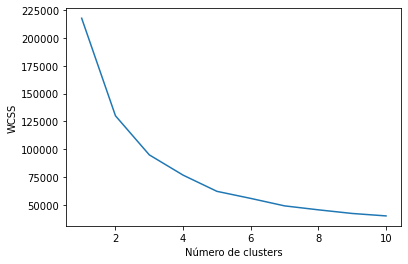

In [31]:
#visualizando meu metodo 
plt.plot(range(1, 11), wcss) 
plt.xlabel('Número de clusters') 
plt.ylabel('WCSS') 
plt.show()

### Observando o grafico acima consigo perceber que talvez o número de clusteres 
### seria na media de 4 a 6,  o metodo é muito eficaz pois a ideia é quanto mais baixo é melhor
### e o grafico tem uma curva acentuada, para visualizar exatamente o número de cluster ideal
### vou visualiza os dados com a biblioteca yellowbrick

In [32]:
#import a biblioteca
from yellowbrick.cluster import KElbowVisualizer

C:\Users\patricia.sousa\Anaconda4\lib\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\Users\patricia.sousa\Anaconda4\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\patricia.sousa\Anaconda4\lib\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\Users\patricia.sousa\Anaconda4\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [33]:
#instancio a funcao dentro de uma variavel
kmeans_dados_elbow = KMeans(random_state=42)

C:\Users\patricia.sousa\Anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patricia.sousa\Anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patricia.sousa\Anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patricia.sousa\Anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patricia.so

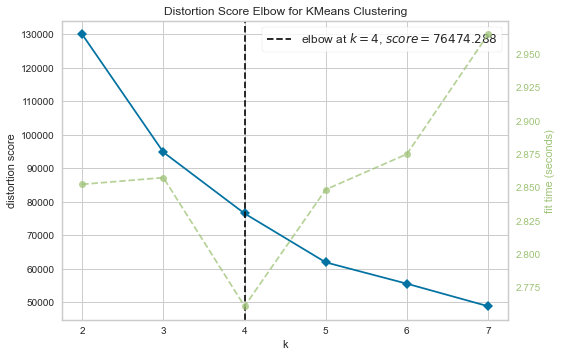

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
#distorção: média das distâncias quadradas dos centros dos clusters dos respectivos clusters
# trago a visualizacao com o padrao de 2 a 8 para a visualizacao ser de todo conjunto
# e o resultado é 4 clusteres é o ideal para o modelo 
grafico = KElbowVisualizer(kmeans_dados_elbow, k=(2,8))
grafico.fit(X_normalizado)        
grafico.show() 

In [35]:
#rodar novamente o modelo com cluster 4
kmeans_dados_final = KMeans(n_clusters = 4, random_state=42)
rotulos_kmeans_final = kmeans_dados_final.fit_predict(X_normalizado)

C:\Users\patricia.sousa\Anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


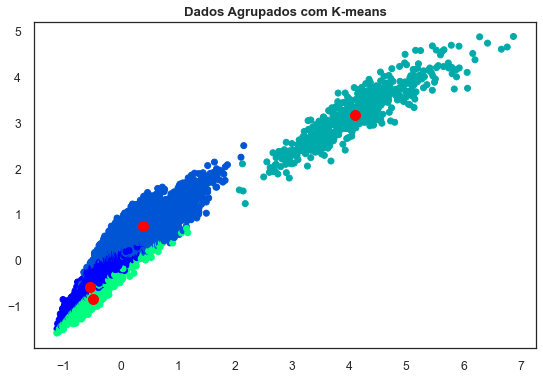

In [36]:
#visualizacao do modelo 
#aqui o design do meu grafico 
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=X_normalizado[:,0], y=X_normalizado[:, 2], c=rotulos_kmeans_final, cmap='winter')

#plot dos centroides
plt.scatter(kmeans_dados_final.cluster_centers_[:, 0], 
            kmeans_dados_final.cluster_centers_[:, 2], 
            s=100,                             
            c='red') 

plt.title('Dados Agrupados com K-means',fontweight='bold')
plt.show()


#conclusao que eu tenho 4 clusteres onde dois deles são muito relacionados 
#azul escuro e verde escurto